# Image variations using Stable Diffusion
Models such as [Stable Diffusion](https://huggingface.co/runwayml/stable-diffusion-v1-5) can take images, vary them in a latent space and then return a new image that appears a variation of the original. This can be useful for producing multiple similar example images and studying if algorithms, e.g. for segmentation, are capable to process these image variations.

The example shown here is adapted from [this source](https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/img2img)

In [1]:
import requests
import torch
import PIL
from io import BytesIO
from skimage.io import imread
import numpy as np
import stackview
import matplotlib.pyplot as plt
from diffusers import StableDiffusionImg2ImgPipeline

We load a pipeline on the GPU first.

In [2]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
            "runwayml/stable-diffusion-v1-5", 
            torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Here we load our numpy-array-like image and convert it to be a pillow image, which is the required input type.

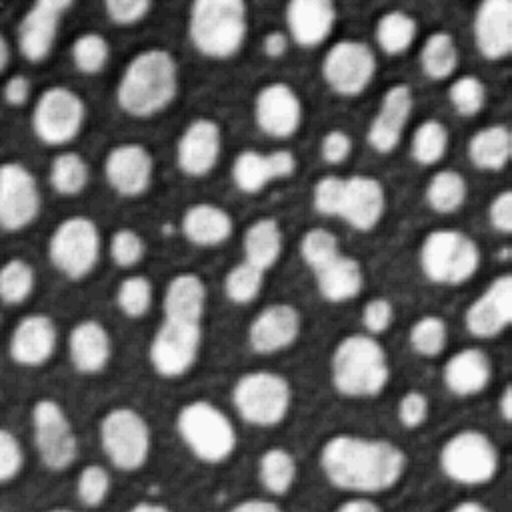

In [3]:
image_np = imread("../../data/blobs.tif")
image_rgb_np = np.asarray([image_np, image_np, image_np]).swapaxes(0, 2).swapaxes(0, 1)
init_image = PIL.Image.fromarray(image_rgb_np)
init_image = init_image.resize((512, 512))
init_image

We can now vary this image using a prompt.

  0%|          | 0/25 [00:00<?, ?it/s]

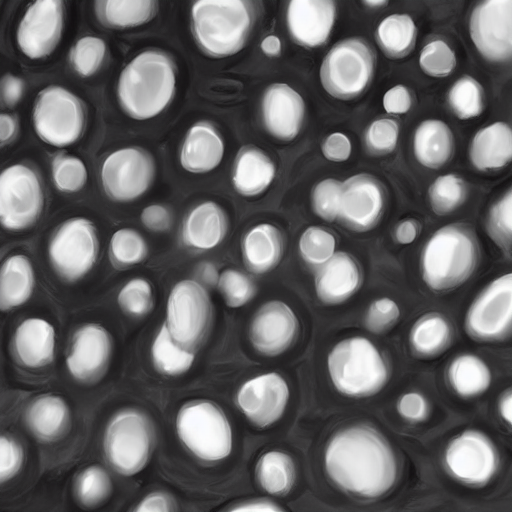

In [4]:
image = pipe(
              prompt="brighter blobs", 
              image=init_image, 
              strength=0.5, 
              guidance_scale=7.5, 
            ).images[0]
image

The `strength` parameter allows us to tune how similar the new image should be to the original.

0it [00:00, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

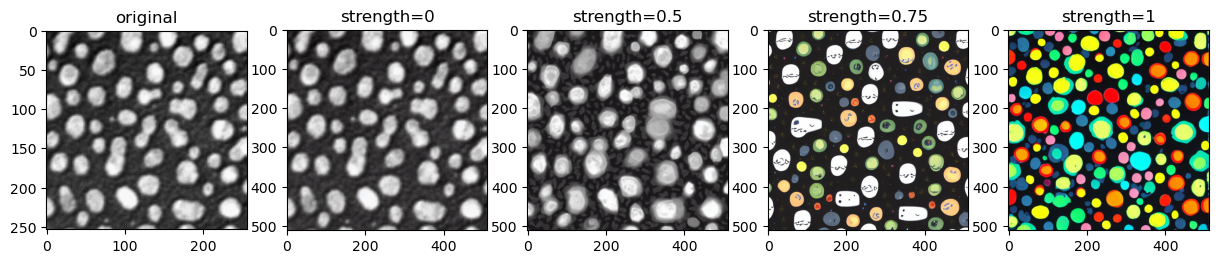

In [5]:
strengths = [0, 0.5, 0.75, 1]

fig, axs = plt.subplots(1, 5, figsize=(15, 15))
axs[0].imshow(image_rgb_np)
axs[0].set_title(f"original")

for i, strength in enumerate(strengths):
    image = pipe(
              prompt="brighter blobs", 
              image=init_image, 
              strength=strength, 
              guidance_scale=7.5, 
            ).images[0]
    
    np_image = np.array(image)
    axs[i+1].imshow(np_image)
    axs[i+1].set_title(f"strength={strength}")


Obviously, the model has not been trained [only] on bio-medical imaging data.

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

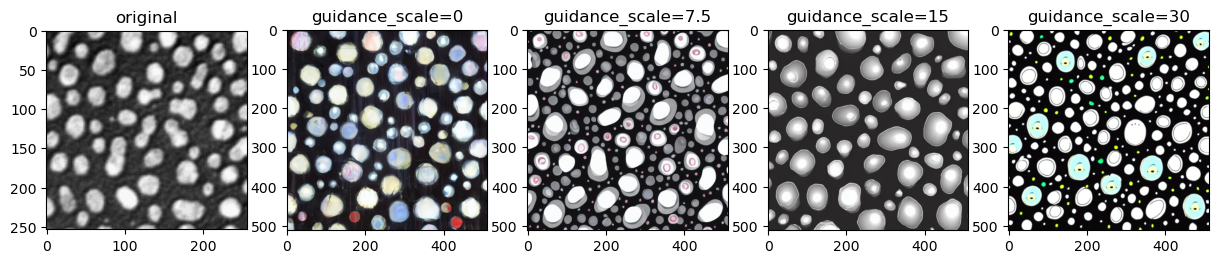

In [6]:
scales = [0, 7.5, 15, 30]

fig, axs = plt.subplots(1, 5, figsize=(15, 15))
axs[0].imshow(image_rgb_np)
axs[0].set_title(f"original")

for i, scale in enumerate(scales):
    image = pipe(
              prompt="brighter blobs", 
              image=init_image, 
              strength=0.75, 
              guidance_scale=scale, 
            ).images[0]
    
    np_image = np.array(image)
    axs[i+1].imshow(np_image)
    axs[i+1].set_title(f"guidance_scale={scale}")


With careful parameter tuning and prompting one can also achieve science-art.

  0%|          | 0/25 [00:00<?, ?it/s]

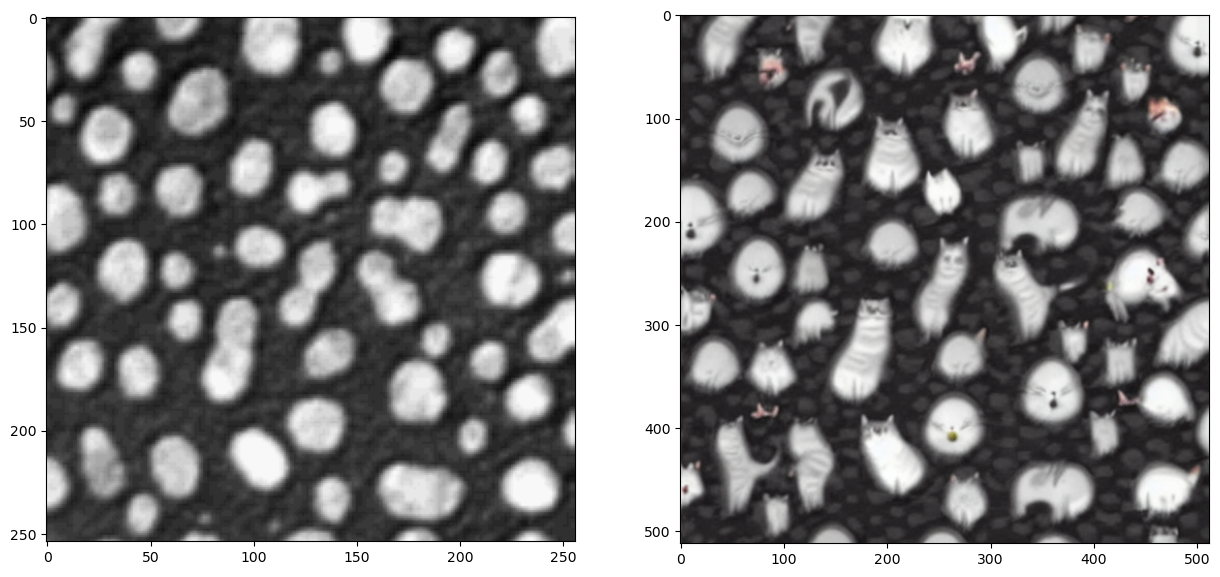

In [9]:
image = pipe(
              prompt="cats instead of bright blobs", 
              image=init_image, 
              strength=0.5, 
              guidance_scale=7.5, 
            ).images[0]

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(image_rgb_np)
axs[1].imshow(np.array(image))

## Exercise
Vary the blobs image in a way that the edges become smoother compared to the original.